In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
print(df.columns)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [4]:
city_aqi = df.groupby("City")["AQI"].mean().sort_values(ascending=False)
print(city_aqi.head(10))


City
Ahmedabad       452.122939
Delhi           259.487744
Patna           240.782042
Gurugram        225.123882
Lucknow         217.973059
Talcher         172.886819
Jorapokhar      159.251621
Brajrajnagar    150.280505
Kolkata         140.566313
Guwahati        140.111111
Name: AQI, dtype: float64


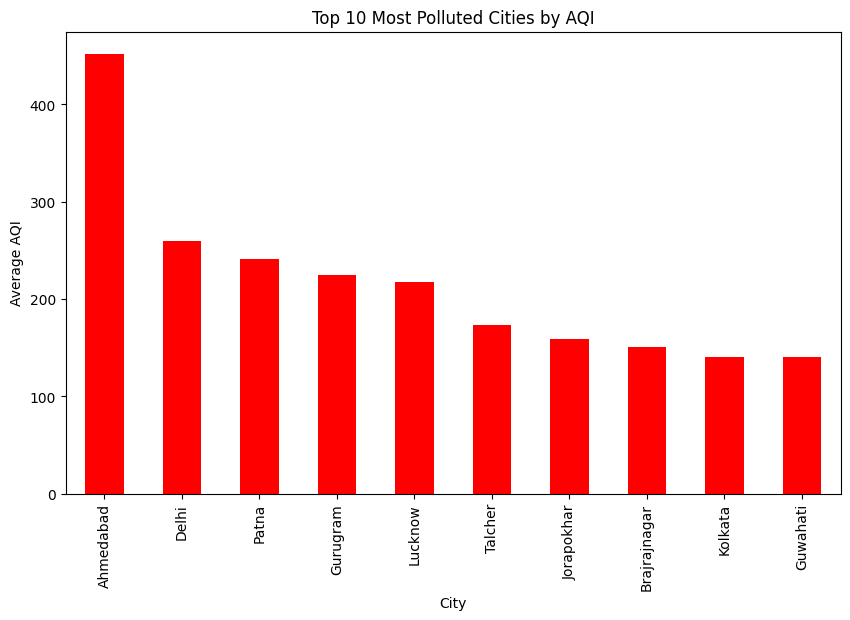

In [5]:
city_aqi.head(10).plot(kind="bar", figsize=(10,6), color="red")
plt.title("Top 10 Most Polluted Cities by AQI")
plt.ylabel("Average AQI")
plt.show()


In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
monthly_aqi = df.groupby("Month")["AQI"].mean()
print(monthly_aqi)


Month
1     231.674918
2     202.905197
3     164.735281
4     143.355120
5     135.489579
6     120.198379
7     111.854575
8     113.613176
9     115.191804
10    188.613552
11    241.681302
12    227.084980
Name: AQI, dtype: float64


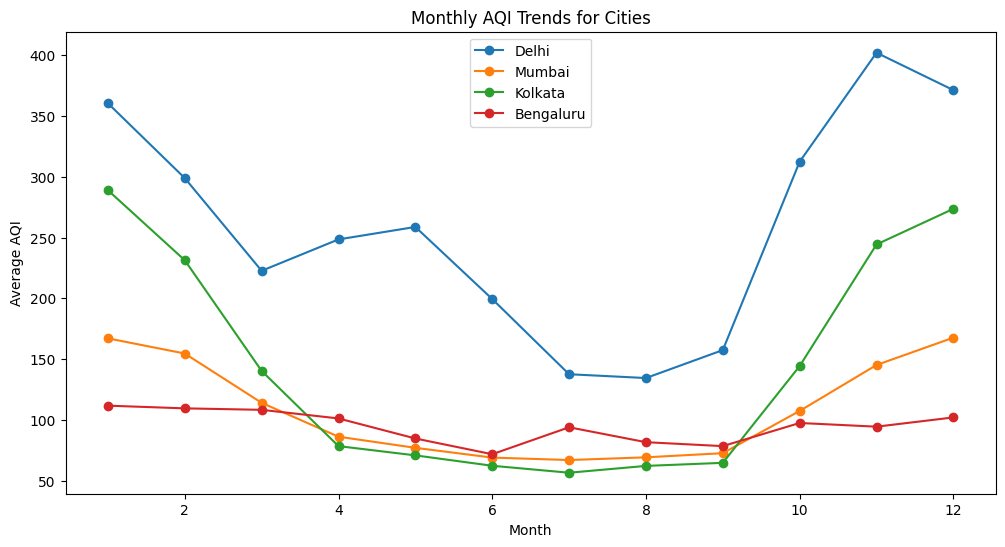

In [7]:
plt.figure(figsize=(12,6))
for city in ["Delhi","Mumbai","Kolkata","Bengaluru"]:  # choose major cities
    city_monthly = df[df["City"]==city].groupby("Month")["AQI"].mean()
    plt.plot(city_monthly.index, city_monthly.values, marker="o", label=city)

plt.title("Monthly AQI Trends for Cities")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.legend()
plt.show()


In [8]:
pollutants = ["PM2.5","PM10","NO2","SO2","O3","CO"]
print(df[pollutants].mean())


PM2.5     67.450578
PM10     118.127103
NO2       28.560659
SO2       14.531977
O3        34.491430
CO         2.248598
dtype: float64


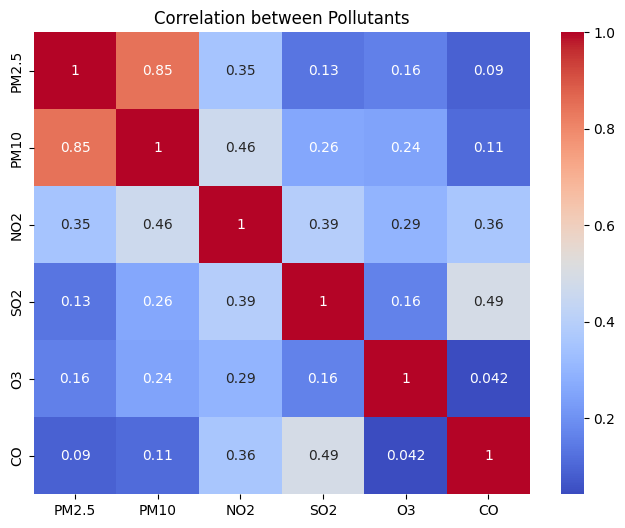

In [9]:
corr = df[pollutants].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Pollutants")
plt.show()


In [10]:
cleanest = df.groupby("City")["AQI"].mean().sort_values().head(1)
print(cleanest)


City
Aizawl    34.765766
Name: AQI, dtype: float64


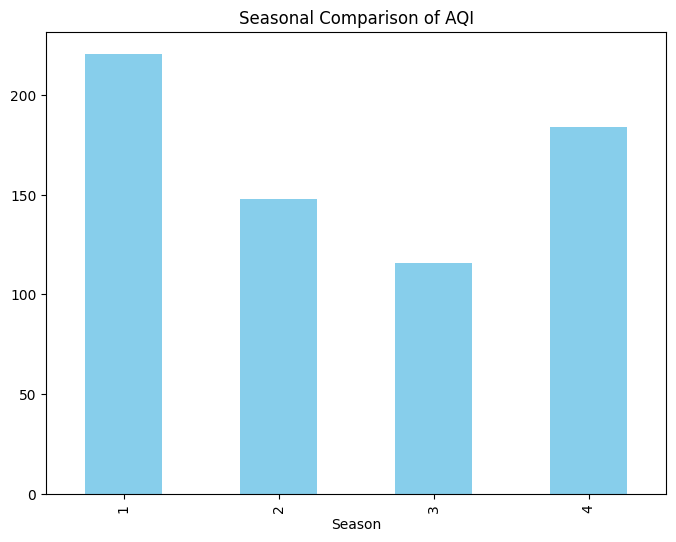

In [11]:
df['Season'] = df['Month']%12 // 3 + 1  # Winter=1, Spring=2, Summer=3, Autumn=4
seasonal = df.groupby("Season")["AQI"].mean()
seasonal.plot(kind="bar", color="skyblue", figsize=(8,6))
plt.title("Seasonal Comparison of AQI")
plt.show()


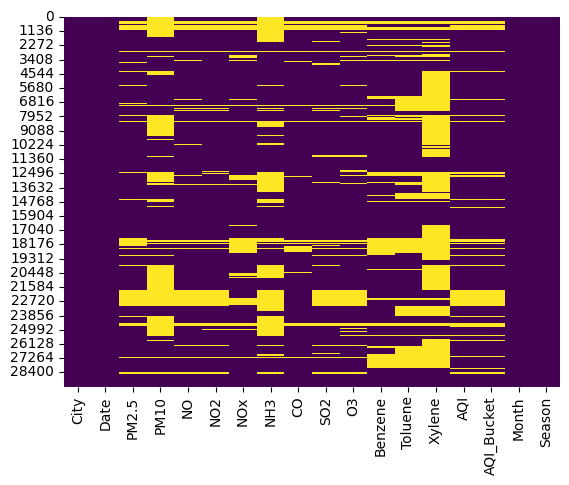

In [12]:
df.isnull().sum()
df
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

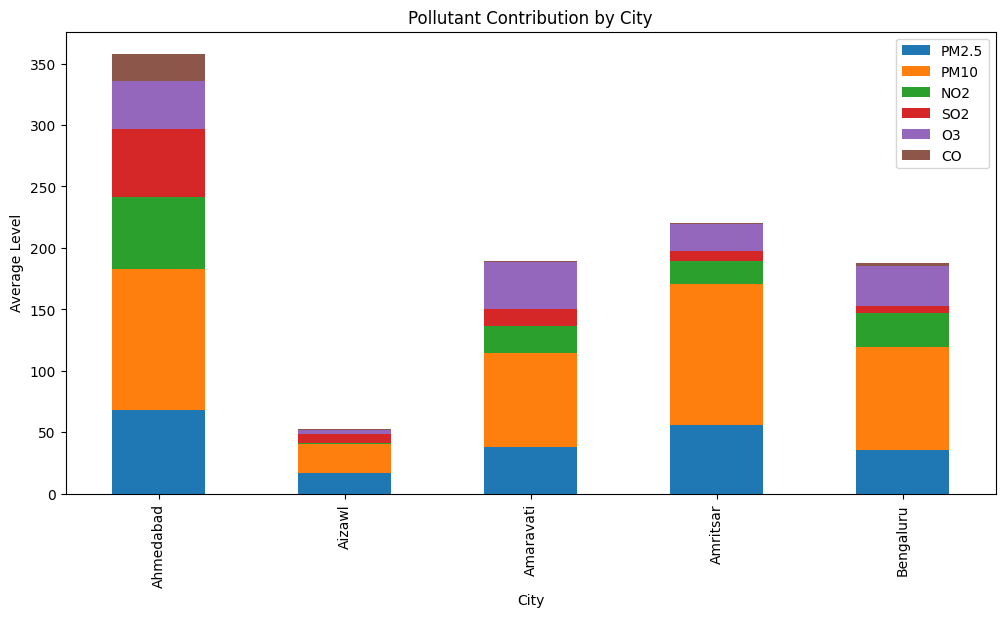

In [13]:
city_pollutants = df.groupby("City")[pollutants].mean().head(5)  # first 5 cities
city_pollutants.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Pollutant Contribution by City")
plt.ylabel("Average Level")
plt.show()


In [14]:
# Safe limit
safe_limit = 100

# Create a new column whether AQI exceeded limit
df["Exceed"] = df["AQI"] > safe_limit

# Calculate percentage of exceed days per city
city_exceed = df.groupby("City")["Exceed"].mean().sort_values(ascending=False) * 100

print(city_exceed.head(10))   # Top 10 cities with highest % exceedance


City
Delhi           90.592334
Lucknow         75.311100
Gurugram        71.888029
Jaipur          69.389587
Patna           69.321851
Bhopal          69.204152
Ahmedabad       64.211050
Brajrajnagar    61.513859
Talcher         57.189189
Jorapokhar      53.378956
Name: Exceed, dtype: float64


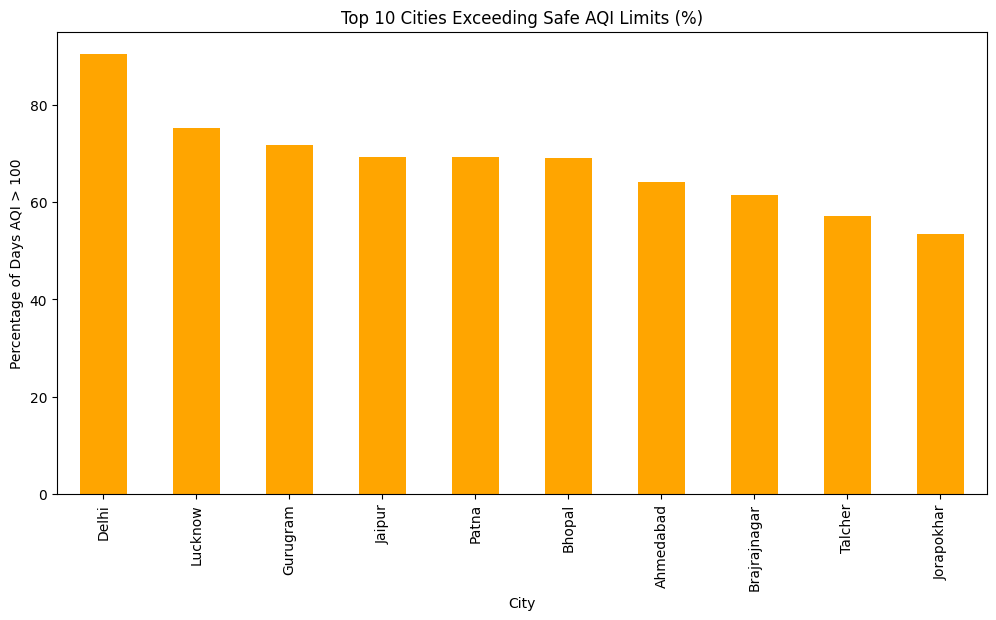

In [15]:
# Visualization
plt.figure(figsize=(12,6))
city_exceed.head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Cities Exceeding Safe AQI Limits (%)")
plt.ylabel("Percentage of Days AQI > 100")
plt.show()


In [16]:
# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Ensure AQI is numeric
df["AQI"] = pd.to_numeric(df["AQI"], errors="coerce")

# Extract weekday (0=Monday ... 6=Sunday)
df["Weekday"] = df["Date"].dt.dayofweek

# Classify into Weekday vs Weekend (without lambda)
df["Day_Type"] = np.where(df["Weekday"] >= 5, "Weekend", "Weekday")

# Group and calculate average AQI
day_type_aqi = df.groupby("Day_Type")["AQI"].mean().sort_values(ascending=False)
print(day_type_aqi)


Day_Type
Weekday    167.253074
Weekend    164.497612
Name: AQI, dtype: float64


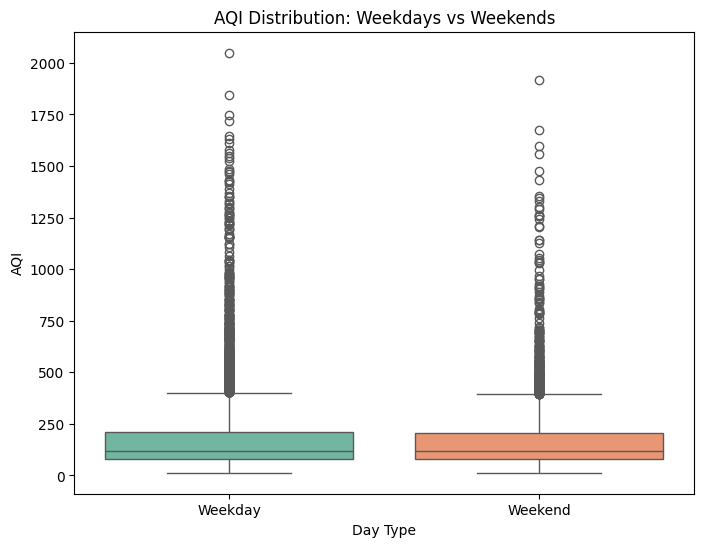

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Day_Type", y="AQI", hue="Day_Type", data=df, palette="Set2", legend=False)
plt.title("AQI Distribution: Weekdays vs Weekends")
plt.xlabel("Day Type")
plt.ylabel("AQI")
plt.show()
